In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt

In [4]:
input_data = pd.read_csv('raw_data/all_raw_remnant_input.csv')

In [30]:
sequence_id_data = pd.get_dummies(input_data[['sequence_id']], columns=['sequence_id'], dummy_na=True)

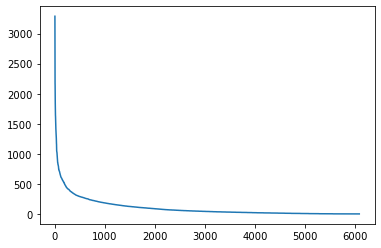

In [15]:
plt.plot(np.arange(len(sequence_id_data.columns)), np.flip(np.sort(sequence_id_data.sum().values)))

In [64]:
input_data['sequence_id'] = input_data['sequence_id'].fillna(-1)
sequence_id_data = pd.get_dummies(input_data[['sequence_id']], columns=['sequence_id'])
sum_data = sequence_id_data.sum()

In [66]:
sum_columns = sum_data.index
sum_values = sum_data.values
ordered_columns = sum_columns[np.flip(np.argsort(sum_values))]
sum_values = np.flip(np.sort(sum_values))
sum_values = sum_values / len(sequence_id_data)
sum_values = np.flip(np.sort(sum_values))
cum_sum = np.cumsum(sum_values)
keeper_index = len(cum_sum[cum_sum <= 0.90])
keeper_columns = ordered_columns[:keeper_index]
keeper_sequences = [float(c[12:]) for c in keeper_columns]
input_data['sequence_id'] = input_data['sequence_id'].apply(lambda x: x if x in keeper_sequences else -2)

In [67]:
input_data['sequence_id'].va

0             -1.0
1             -1.0
2             -1.0
3         429488.0
4             -1.0
            ...   
960052    562896.0
960053    458321.0
960054     35008.0
960055    562896.0
960056     39659.0
Name: sequence_id, Length: 960057, dtype: float64

In [54]:
len(input_data)

960057

In [57]:
len(new_data)

960057

In [63]:
'sequence_id_1'[12:]

'1'